# Table de hachage à adressage ouvert

## Librairies

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Table de hachage

In [2]:
class TableHachage():
    
    def __init__(self, N, f_hachage):
        """
        Table de hachage qui range des entiers (clés) dans un tableau.
        
        Attributes
        ----------
        N : int
            taille de la table de hachage
        f_hachage : str
            fonction de hachage
        """
        self.N = N
        self.f_hachage = f_hachage
        self.table = [None] * N
        self.nb_collisions = 0
        
    def inserer(self, cle):
        """
        Si possible, insérer une clé dans la table de hachage
        à l'aide de la fonction de hachage.
        Compte également le nombre de collisions rencontrées au cours
        du processus d'insertion et incrémente self.nb_collisions.
        
        Parameters
        ----------
        cle : int
            cle à insérer dans la table de hachage
        """
        
        insertion = False
        nb_tentatives = 1
        
        while insertion == False and nb_tentatives <= self.N:
            
            indice = self.f_hachage(cle, nb_tentatives)
            
            if self.table[indice] is None:
                
                self.table[indice] = cle
                insertion = True
                
            else:
                
                nb_tentatives += 1
        
        # incrémente le nombre de collisions
        self.nb_collisions += nb_tentatives - 1

## Expériences

Chaque expérience consiste à:
- Tirer N//2 clés *différentes* aléatoirement dans l'ensemble [0,...,nb_cles]
- Insérer les clés dans la table de hachage une par une (si possible) 
- Compter le nombre (cumulatif) de collisions lors des insertions successives

In [3]:
N = 1023        # taille de la table
nb_cles = 10000 # nombre de clés possibles

In [4]:
def experience(f, N=N):
    
    table = TableHachage(N, f)
    compteur = []
    
    # tirage sans remise
    cles = random.sample(range(nb_cles), N//2)
    
    for cle in cles:
        
        table.inserer(cle)
        compteur.append(table.nb_collisions)
        
    return compteur

On considère $3$ fonctions de hachage différentes.

In [5]:
def f_hachage1(cle, nb_tentatives):
    
    # nb_tentatives commence à 1, donc x à 0
    x = nb_tentatives - 1
    
    return (cle + x) % N 

In [6]:
def f_hachage2(cle, nb_tentatives):
    
    # nb_tentatives commence à 1, donc x à 0
    x = nb_tentatives - 1
    
    return (cle + 3*x**2 + x + 13) % N 

In [7]:
def f_hachage3(cle, nb_tentatives):
    
    # nb_tentatives commence à 1, donc x à 0
    x = nb_tentatives - 1
    
    return (cle + 7*x**3 + 12*x**2 + 9*x + 17) % N 

Pour chaque fonction de hachage, on fait la moyenne de $50$ expériences.

In [8]:
# Pour chaque fonction de hachage, 
# on fait la moyenne de 50 tentatives...

fonctions = [f_hachage1, f_hachage2, f_hachage3]
nb_repetitions = 50

res = {}   # résultats

for i in range(3):
    
    res_i = [] # liste de listes

    # 50 expériences
    for n in range(nb_repetitions):

        tmp = experience(fonctions[i])
        res_i.append(tmp)

    # moyennes des 50 expériences
    res_i = np.array(res_i)
    res_i = res_i.mean(axis=0)
    
    res[i] = res_i

## Graphique

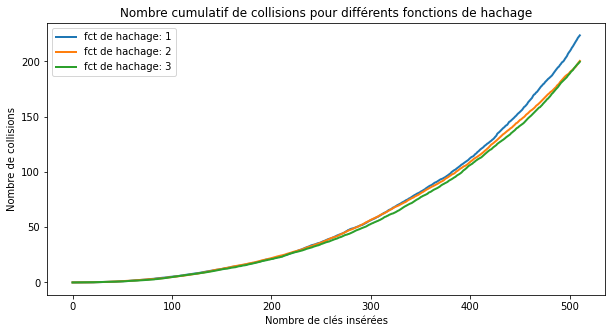

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(3):
    ax.plot(range(len(res[i])), res[i], linewidth=2, label=f'fct de hachage: {i+1}')

ax.set_xlabel("Nombre de clés insérées")
ax.set_ylabel("Nombre de collisions")
ax.set_title('Nombre cumulatif de collisions pour différents fonctions de hachage')
ax.legend()

plt.show()